# Part 0: Bài toán cần giải ?

**Phân tích review của khách hàng về 1 sản phẩm trên Amazon có tốt hay không**

*Dữ liệu sử dụng:* [Các review về dụng cụ bổ trợ cho các dòng Ipad](https://www.amazon.com/Screen-Protector-SPARIN-Tempered-Glass/product-reviews/B013JZCAZK/ref=cm_cr_arp_d_viewopt_sr?ie=UTF8&reviewerType=all_reviews&pageNumber=1&filterByStar=one_star)

**Thông tin các thuộc tính:**
- **Input**:
    + web-scraper-order
    + author: tên khách hàng
    + title: ý chính của review
    + content: nội dung review
- **Output**:
    + positively_rated: tốt hay không



# Part 1: Lấy dữ liệu

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('Amazon_reviews_after.xlsx')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 5 columns):
web-scraper-order    5001 non-null object
author               4999 non-null object
title                5000 non-null object
content              5000 non-null object
positively_rated     5000 non-null float64
dtypes: float64(1), object(4)
memory usage: 195.5+ KB


In [3]:
data.head()

,web-scraper-order,author,title,content,positively_rated
0,1578435708-8343,Polly,Like,So far so good,1.0
1,1578435601-7934,Amazon Customer,Fine,When a cover is added to it it can make the sc...,1.0
2,1578435221-6562,B. Peden,Perfect for iPad,No issues installing. Works great!,1.0
3,1578435279-6781,Jason McMurry,Received and installed the product yesterday. ...,Received and installed the product yesterday. ...,1.0
4,1578435305-6876,Amazon Customer,Great customer service,I received the product and it Did not work. Pu...,1.0


# Part 2: Tìền xử lý dữ liệu

## Tìm  kiếm và xử lý bất thường (thiếu dữ liệu, trùng lắp, outliers, ...)

In [4]:
data = data.dropna(axis = 0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4999 entries, 0 to 5000
Data columns (total 5 columns):
web-scraper-order    4999 non-null object
author               4999 non-null object
title                4999 non-null object
content              4999 non-null object
positively_rated     4999 non-null float64
dtypes: float64(1), object(4)
memory usage: 234.3+ KB


## Chuẩn hóa dữ liệu

In [5]:
# Loại bỏ các ký tự không mong muốn
data['content'] = data['content'].str.replace('[^a-zA-Z]', ' ')
data.head()

,web-scraper-order,author,title,content,positively_rated
0,1578435708-8343,Polly,Like,So far so good,1.0
1,1578435601-7934,Amazon Customer,Fine,When a cover is added to it it can make the sc...,1.0
2,1578435221-6562,B. Peden,Perfect for iPad,No issues installing Works great,1.0
3,1578435279-6781,Jason McMurry,Received and installed the product yesterday. ...,Received and installed the product yesterday ...,1.0
4,1578435305-6876,Amazon Customer,Great customer service,I received the product and it Did not work Pu...,1.0


In [6]:
# Chuẩn hóa lại chữ
data['content'] = data['content'].str.lower()
data.head()

,web-scraper-order,author,title,content,positively_rated
0,1578435708-8343,Polly,Like,so far so good,1.0
1,1578435601-7934,Amazon Customer,Fine,when a cover is added to it it can make the sc...,1.0
2,1578435221-6562,B. Peden,Perfect for iPad,no issues installing works great,1.0
3,1578435279-6781,Jason McMurry,Received and installed the product yesterday. ...,received and installed the product yesterday ...,1.0
4,1578435305-6876,Amazon Customer,Great customer service,i received the product and it did not work pu...,1.0


In [7]:
data['char_count'] = data['content'].str.len()
data['word_count'] = data['content'].str.split().str.len()
data['avg_word_length'] = data['char_count'] / data['word_count']
data.head()

,web-scraper-order,author,title,content,positively_rated,char_count,word_count,avg_word_length
0,1578435708-8343,Polly,Like,so far so good,1.0,14.0,4.0,3.500000
1,1578435601-7934,Amazon Customer,Fine,when a cover is added to it it can make the sc...,1.0,68.0,15.0,4.533333
2,1578435221-6562,B. Peden,Perfect for iPad,no issues installing works great,1.0,34.0,5.0,6.800000
3,1578435279-6781,Jason McMurry,Received and installed the product yesterday. ...,received and installed the product yesterday ...,1.0,312.0,51.0,6.117647
4,1578435305-6876,Amazon Customer,Great customer service,i received the product and it did not work pu...,1.0,210.0,38.0,5.526316


## Trực quan hóa để có thông tin chi tiết

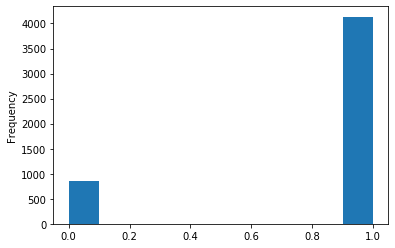

In [8]:
data['positively_rated'].plot.hist()

In [9]:
data['positively_rated'].value_counts()

1.0    4135
0.0     864
Name: positively_rated, dtype: int64

## Xử lý dữ liệu mất cân bằng

In [10]:
# Vì dữ liệu class 1 tương đối nhiều => do đó ta sẽ áp dụng Undersampling để giảm số mẫu của nhóm
data_0 = data[data['positively_rated'] == 0]
data_1 = data[data['positively_rated'] == 1]
display(data_0.shape, data_1.shape)

(864, 8)

(4135, 8)

In [11]:
from sklearn.utils import resample
data_1_resample = resample(data_1, replace=False, n_samples=data_0.shape[0], random_state=27)
display(data_0.shape, data_1_resample.shape)

(864, 8)

(864, 8)

In [12]:
data = pd.concat([data_0, data_1_resample])
data.head()

,web-scraper-order,author,title,content,positively_rated,char_count,word_count,avg_word_length
8,1578435063-5979,Sarah Hamilton,cheaply made,seemed great at first was easy to install but...,0.0,154.0,29.0,5.310345
10,1578435386-7159,Maddie,It came broken,i liked it came in quickly but it was broken w...,0.0,62.0,14.0,4.428571
19,1578435334-6978,Nancy Hester,NOTHING HAPPENS TO IT!!! Is your screen that c...,my ipad fell yesterday and nothing happened to...,0.0,94.0,16.0,5.875000
21,1578435456-7400,Rabia,Bad!,broke within a week it has so many cracks alr...,0.0,132.0,23.0,5.739130
22,1578435014-5800,Abearinpa,good idea good buy no cases allowed,best part is the worse part in that this is a ...,0.0,262.0,56.0,4.678571


# Part 3: Thiết lập model phù hợp

## Chuẩn bị dữ liệu cho model

In [13]:
features = data[['content']] # làm với dữ liệu văn bản => để kiểu series
features.head()

,content
8,seemed great at first was easy to install but...
10,i liked it came in quickly but it was broken w...
19,my ipad fell yesterday and nothing happened to...
21,broke within a week it has so many cracks alr...
22,best part is the worse part in that this is a ...


In [14]:
targets = data[['positively_rated']]
targets.head()

,positively_rated
8,0.0
10,0.0
19,0.0
21,0.0
22,0.0


### Với CountVectorizer

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
cv.fit(features['content'].values.astype('U'))

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [ ]:
# print(cv.get_feature_names())

In [ ]:
# cv.vocabulary_

In [18]:
bag_of_words_cv = cv.transform(features['content'].values.astype('U'))
bag_of_words_cv

<1728x3718 sparse matrix of type '<class 'numpy.int64'>'
	with 31412 stored elements in Compressed Sparse Row format>

In [19]:
features_cv = pd.DataFrame(bag_of_words_cv.toarray(), columns=cv.get_feature_names()).add_prefix('CV_')
features_cv.head()

,CV_ability,CV_able,CV_abrasion,CV_absence,CV_absolute,CV_absolutely,CV_absorb,CV_absorbed,CV_absorber,CV_absurd,...,CV_yep,CV_yes,CV_yesterday,CV_yor,CV_youbreakit,CV_young,CV_youtube,CV_yr,CV_zagg,CV_zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Với TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(stop_words='english')
tv.fit(features['content'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# print(tv.get_feature_names())

In [ ]:
# tv.vocabulary_

In [23]:
bag_of_words_tv = tv.transform(features['content'].values.astype('U'))
bag_of_words_tv

<1728x3718 sparse matrix of type '<class 'numpy.float64'>'
	with 31412 stored elements in Compressed Sparse Row format>

In [24]:
features_tv = pd.DataFrame(bag_of_words_tv.toarray(), columns=tv.get_feature_names()).add_prefix('TFIDF_')
features_tv.head()

,TFIDF_ability,TFIDF_able,TFIDF_abrasion,TFIDF_absence,TFIDF_absolute,TFIDF_absolutely,TFIDF_absorb,TFIDF_absorbed,TFIDF_absorber,TFIDF_absurd,...,TFIDF_yep,TFIDF_yes,TFIDF_yesterday,TFIDF_yor,TFIDF_youbreakit,TFIDF_young,TFIDF_youtube,TFIDF_yr,TFIDF_zagg,TFIDF_zero
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.473768,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
features_tv.iloc[0].sort_values(ascending=False).head()

TFIDF_claimed     0.445143
TFIDF_features    0.405392
TFIDF_anti        0.342389
TFIDF_month       0.313095
TFIDF_proof       0.305080
Name: 0, dtype: float64

### Với TF-IDF và N-grams

In [26]:
tv_bi_gram = TfidfVectorizer(ngram_range = (1, 2), stop_words='english')
tv_bi_gram.fit(features['content'].values.astype('U'))

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [ ]:
# print(tv_bi_gram.get_feature_names())

In [ ]:
# tv_bi_gram.vocabulary_

In [29]:
bag_of_words_tv_bi_gram = tv_bi_gram.transform(features['content'].values.astype('U'))
bag_of_words_tv_bi_gram

<1728x27911 sparse matrix of type '<class 'numpy.float64'>'
	with 64797 stored elements in Compressed Sparse Row format>

In [30]:
features_tv_bi_gram = pd.DataFrame(bag_of_words_tv_bi_gram.toarray(), columns=tv_bi_gram.get_feature_names()).add_prefix('TV_Ngrams_')
features_tv_bi_gram.head()

,TV_Ngrams_ability,TV_Ngrams_ability screen,TV_Ngrams_able,TV_Ngrams_able accidentally,TV_Ngrams_able accurately,TV_Ngrams_able air,TV_Ngrams_able apply,TV_Ngrams_able compare,TV_Ngrams_able glass,TV_Ngrams_able hold,...,TV_Ngrams_zero,TV_Ngrams_zero anti,TV_Ngrams_zero bubbles,TV_Ngrams_zero comes,TV_Ngrams_zero dust,TV_Ngrams_zero room,TV_Ngrams_zero scratches,TV_Ngrams_zero shattered,TV_Ngrams_zero star,TV_Ngrams_zero stars
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
features_tv_bi_gram.iloc[0].sort_values(ascending=False).head()

TV_Ngrams_glare features     0.270214
TV_Ngrams_claimed            0.270214
TV_Ngrams_use anti           0.270214
TV_Ngrams_claimed smudge     0.270214
TV_Ngrams_install cracked    0.270214
Name: 0, dtype: float64

In [32]:
tv_sums = features_tv_bi_gram.sum()
tv_sums.sort_values(ascending=False).head()

TV_Ngrams_screen              60.075059
TV_Ngrams_protector           45.798609
TV_Ngrams_ipad                41.230729
TV_Ngrams_good                39.558653
TV_Ngrams_screen protector    34.639696
dtype: float64

## Lựa chọn mô hình phù hợp

In [33]:
import time
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [34]:
# Tính độ chính xác theo: Logistic, Random Forest, SVM, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
models = [RandomForestClassifier(n_estimators = 200, max_depth = 3, random_state = 0),
          MultinomialNB(), LogisticRegression(random_state = 0)]

In [35]:
CV = 5
cv_df = pd.DataFrame(index = range(CV * len(models)))
entries = []
                        
for model in models:
    model_name = model.__class__.__name__
    
    begin = time.time()
    accuracies = cross_val_score(model, features_tv_bi_gram, np.ravel(targets), scoring = 'accuracy', cv = CV)
    finish = time.time()
    
    print(accuracies)
    entries.append([model_name, finish - begin, sum(accuracies) / len(accuracies)])

[0.76300578 0.80924855 0.80924855 0.8115942  0.79130435]
[0.84682081 0.86416185 0.85549133 0.82898551 0.81449275]
[0.84393064 0.83815029 0.83815029 0.82318841 0.80289855]


In [36]:
cv_df = pd.DataFrame(entries, columns = ['model_name', 'time', 'accuracy'])
cv_df

,model_name,time,accuracy
0,RandomForestClassifier,5.595037,0.796880
1,MultinomialNB,1.853410,0.841990
2,LogisticRegression,7.179359,0.829264


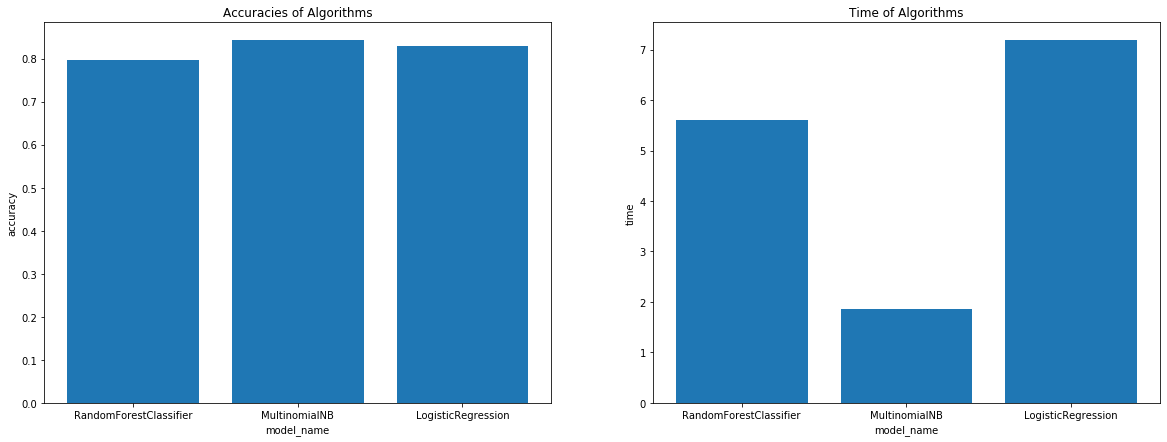

In [44]:
fig = plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.bar(cv_df['model_name'], cv_df['accuracy'])
plt.xlabel('model_name')
plt.ylabel('accuracy')
plt.xticks(rotation = 'horizontal')
plt.title("Accuracies of Algorithms")

plt.subplot(1, 2, 2)
plt.bar(cv_df['model_name'], cv_df['time'])
plt.xlabel('model_name')
plt.ylabel('time')
plt.xticks(rotation = 'horizontal')
plt.title("Time of Algorithms")

plt.show()

## Áp dụng Grid SearchCV xác định các tham số tốt nhất cho mô hình

In [60]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

param_dist = {
    'alpha': [1.0e-10,  1],
    'fit_prior': [True, False],
}

In [61]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(features_tv_bi_gram, targets, test_size = 0.1)

In [62]:
model = GridSearchCV(estimator = MultinomialNB(), param_grid = param_dist, cv = 5)
model.fit(X_train, np.ravel(Y_train))
print("Best Model Parameter: ", model.best_params_)

Best Model Parameter:  {'alpha': 1, 'fit_prior': True}


## Xác thực chéo K-Folds để xác định bộ dữ liệu tốt nhất cho mô hình

In [63]:
from sklearn.model_selection import KFold

scores = []
models = []
test_data = []
cv = KFold(n_splits = 10, random_state = 42, shuffle = False)

In [ ]:
for train_index, test_index in cv.split(features):
    # print("Train Index: ", train_index.tolist())
    # print("Test Index: ", test_index.tolist(), "\n")    

    X_train, x_test, Y_train, y_test = features_tv_bi_gram.iloc[train_index.tolist()], features_tv_bi_gram.iloc[test_index.tolist()], np.ravel(targets.iloc[train_index.tolist()]), np.ravel(targets.iloc[test_index.tolist()])
    test_data.append((x_test, y_test))
    
    model = MultinomialNB()
    model.fit(X_train, Y_train)

    scores.append(model.score(x_test, y_test))
    models.append(model)

In [65]:
scores

[0.5317919075144508,
 0.6358381502890174,
 0.6069364161849711,
 0.653179190751445,
 0.6473988439306358,
 0.6473988439306358,
 0.653179190751445,
 0.6820809248554913,
 0.6046511627906976,
 0.6104651162790697]

In [66]:
avg_scores = sum(scores) / len(scores)
avg_scores

0.627291974727786

In [67]:
max_scores = max(scores)
max_scores

0.6820809248554913

In [68]:
vi_tri = -1

for i in range(0, len(scores)):
    if scores[i] == max_scores:
        vi_tri = i
        break
vi_tri

7

In [70]:
best_model = models[vi_tri]
best_model

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [71]:
from sklearn import model_selection

clf_k = MultinomialNB()
kfold = KFold(n_splits = 10, random_state = 42, shuffle = False)
results = model_selection.cross_val_score(clf_k, features_tv_bi_gram, np.ravel(targets), cv = kfold)

print("Accuracy: %.3f%% (%.3f%%)" % (results.mean() * 100.0, results.std() * 100.0))
results

Accuracy: 62.729% (3.944%)


array([0.53179191, 0.63583815, 0.60693642, 0.65317919, 0.64739884,
       0.64739884, 0.65317919, 0.68208092, 0.60465116, 0.61046512])

# Part 4:  Dự đoán và kiểm tra độ chính xác

In [72]:
x_test = test_data[vi_tri][0]
y_test = test_data[vi_tri][1]
y_test[:5]

array([1., 1., 1., 1., 1.])

In [73]:
print('The prediction accuracy is:', best_model.score(x_test, y_test) * 100, '%')

The prediction accuracy is: 68.20809248554913 %


In [74]:
y_pred = best_model.predict(x_test)
y_pred[:5]

array([1., 0., 1., 1., 1.])

In [75]:
from sklearn.metrics import accuracy_score
print('Accuracy is', accuracy_score(y_test, y_pred) * 100, '%')

Accuracy is 68.20809248554913 %


In [76]:
df = pd.DataFrame({'Actual': y_test, 'Prediction': y_pred})  
df.head()

,Actual,Prediction
0,1.0,1.0
1,1.0,0.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [79]:
X_now = tv_bi_gram.transform(np.array(['good', 'bad']))
Y_now = best_model.predict(X_now)
Y_now

array([1., 0.])

## Export model

In [80]:
import pickle
# Save to file in the current working directory
pkl_filename = "pickle_model.pkl"

with open(pkl_filename, 'wb') as file:  
    pickle.dump(model, file)

In [81]:
with open(pkl_filename, 'rb') as file:  
    pickle_model = pickle.load(file)

In [83]:
X_now = tv_bi_gram.transform(np.array(['nice', 'waste money']))
Y_now = pickle_model.predict(X_now)
Y_now

array([1., 0.])